In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data=pd.read_csv('UCI_Credit_Card.csv')

In [3]:
data.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
1135,1136,60000.0,2,2,2,31,0,0,0,0,...,30117,29526,29201.0,3200.0,2535.0,2331.0,0.0,1073.0,2134.0,0
4485,4486,30000.0,1,2,2,21,0,0,0,0,...,15994,12017,5614.0,1385.0,1270.0,367.0,336.0,112.0,0.0,0
1847,1848,30000.0,1,2,2,26,1,3,2,2,...,29504,30276,29695.0,0.0,1060.0,0.0,1251.0,1078.0,1243.0,1
983,984,60000.0,1,3,1,49,0,0,0,0,...,40843,40612,40656.0,3000.0,4506.0,2500.0,1800.0,4200.0,2500.0,0
3390,3391,20000.0,1,2,2,44,1,2,0,0,...,8390,9101,9796.0,0.0,1500.0,1000.0,1000.0,1000.0,1000.0,1


# Explore data

In [4]:
data.nunique()

ID                            4999
LIMIT_BAL                       68
SEX                              2
EDUCATION                        7
MARRIAGE                         4
AGE                             52
PAY_0                           11
PAY_2                           10
PAY_3                           10
PAY_4                            9
PAY_5                            8
PAY_6                            9
BILL_AMT1                     4334
BILL_AMT2                     4257
BILL_AMT3                     4160
BILL_AMT4                     4095
BILL_AMT5                     4031
BILL_AMT6                     3906
PAY_AMT1                      2154
PAY_AMT2                      2097
PAY_AMT3                      1923
PAY_AMT4                      1902
PAY_AMT5                      1880
PAY_AMT6                      1807
default.payment.next.month       2
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          4999 non-null   int64  
 1   LIMIT_BAL                   4999 non-null   float64
 2   SEX                         4999 non-null   int64  
 3   EDUCATION                   4999 non-null   int64  
 4   MARRIAGE                    4999 non-null   int64  
 5   AGE                         4999 non-null   int64  
 6   PAY_0                       4999 non-null   int64  
 7   PAY_2                       4999 non-null   int64  
 8   PAY_3                       4999 non-null   int64  
 9   PAY_4                       4999 non-null   int64  
 10  PAY_5                       4999 non-null   int64  
 11  PAY_6                       4999 non-null   int64  
 12  BILL_AMT1                   4999 non-null   int64  
 13  BILL_AMT2                   4999 

In [6]:
data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [7]:
data.shape

(4999, 25)

In [8]:
data=data.dropna(axis=0,thresh=20)
data=data.dropna(axis=1,thresh=2000)

In [9]:
data.shape

(4999, 25)

In [10]:
data.nunique()

ID                            4999
LIMIT_BAL                       68
SEX                              2
EDUCATION                        7
MARRIAGE                         4
AGE                             52
PAY_0                           11
PAY_2                           10
PAY_3                           10
PAY_4                            9
PAY_5                            8
PAY_6                            9
BILL_AMT1                     4334
BILL_AMT2                     4257
BILL_AMT3                     4160
BILL_AMT4                     4095
BILL_AMT5                     4031
BILL_AMT6                     3906
PAY_AMT1                      2154
PAY_AMT2                      2097
PAY_AMT3                      1923
PAY_AMT4                      1902
PAY_AMT5                      1880
PAY_AMT6                      1807
default.payment.next.month       2
dtype: int64

In [11]:
cat_cols=['SEX','EDUCATION','MARRIAGE']
num_cols=['PAY_4',
 'BILL_AMT1',
 'BILL_AMT4',
 'PAY_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'PAY_AMT6',
 'BILL_AMT6',
 'PAY_6',
 'PAY_0',
 'BILL_AMT5',
 'PAY_5',
 'PAY_AMT3',
 'PAY_AMT5',
 'PAY_AMT4',
 'AGE',
 'PAY_3',
 'PAY_2',
 'PAY_AMT2',
 'LIMIT_BAL']
target=[ 'default.payment.next.month']

In [12]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,...,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,2500.000000,165641.128226,1.572915,1.818364,1.566513,35.368874,0.005201,-0.148230,-0.159232,-0.245049,...,40796.216643,39551.666933,37971.029406,5577.866173,5432.208642,4604.820564,4740.984397,4759.542509,5272.889578,0.221444
std,1443.231328,130352.371413,0.494704,0.765277,0.524630,9.268394,1.131232,1.204663,1.220347,1.143454,...,64019.397067,61618.608345,61481.599372,14855.009484,16282.193491,18008.065662,15128.974160,14851.406733,19748.388380,0.415260
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-28335.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1250.500000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1807.000000,1494.000000,972.500000,1000.000000,639.000000,222.500000,229.500000,208.000000,0.000000,0.000000
50%,2500.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,18009.000000,17356.000000,15872.000000,2114.000000,2000.000000,1404.000000,1500.000000,1500.000000,1319.000000,0.000000
75%,3749.500000,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,49309.000000,49165.500000,48035.000000,5001.000000,5000.000000,4000.000000,4000.000000,4000.000000,4000.000000,0.000000
max,4999.000000,1000000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,7.000000,7.000000,...,891586.000000,927171.000000,961664.000000,368199.000000,344261.000000,896040.000000,497000.000000,332000.000000,528666.000000,1.000000


In [13]:
data['SEX'].value_counts()

2    2864
1    2135
Name: SEX, dtype: int64

([<matplotlib.patches.Wedge at 0x7ff2641e1b50>,
 [Text(-0.24977693526593434, 1.0712662986434127, '2'),
  Text(0.24977703556512254, -1.0712662752576037, '1')])

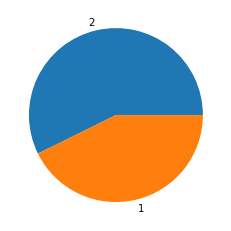

In [14]:
plt.pie(data['SEX'].value_counts(),labels=data['SEX'].value_counts().keys())

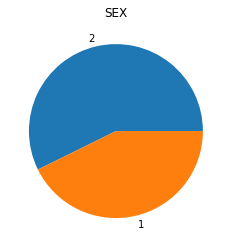

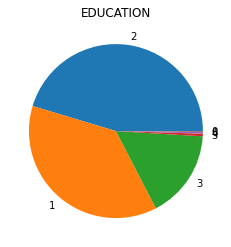

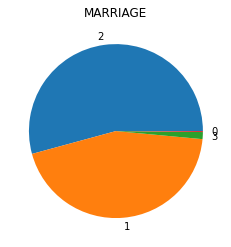

In [15]:
for i in cat_cols:
    plt.pie(data[i].value_counts(),labels=data[i].value_counts().keys())
    plt.title(i)
    plt.show()

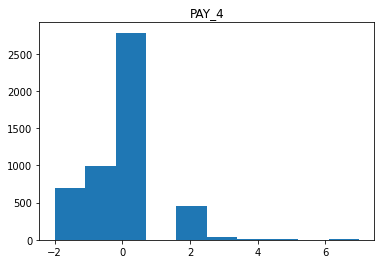

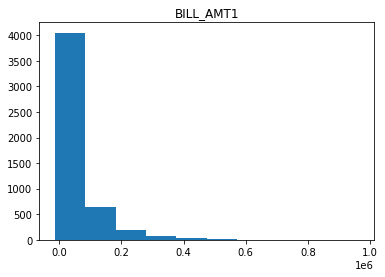

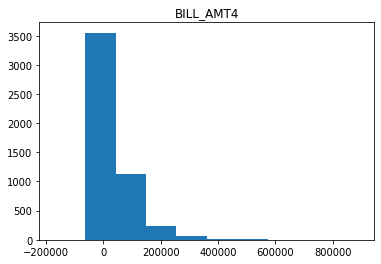

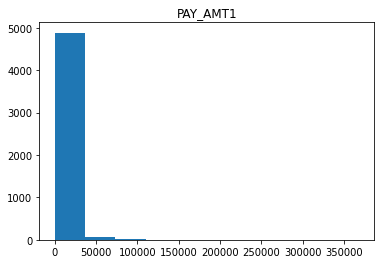

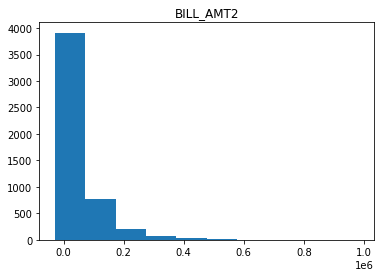

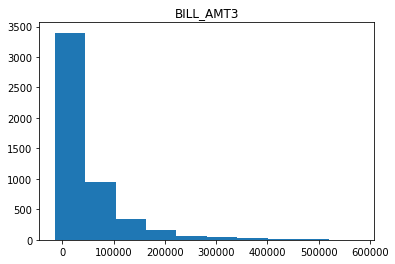

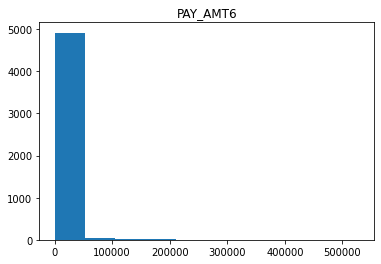

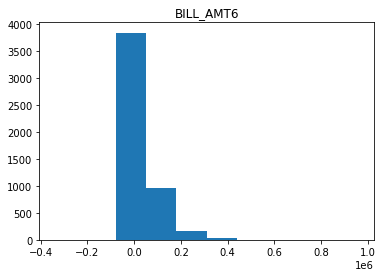

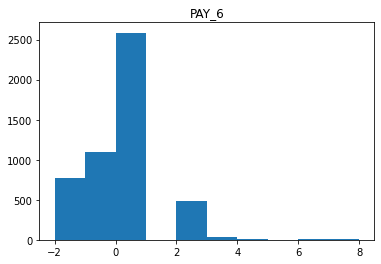

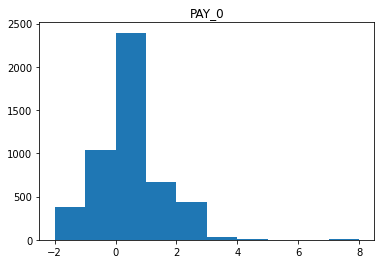

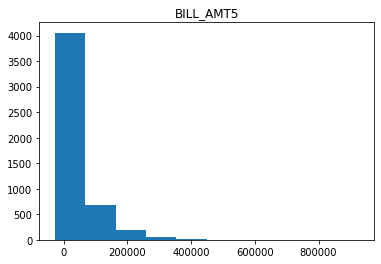

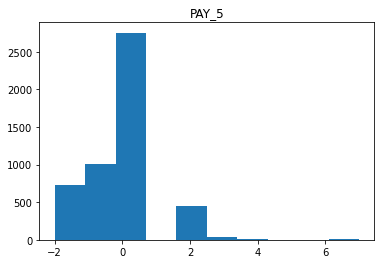

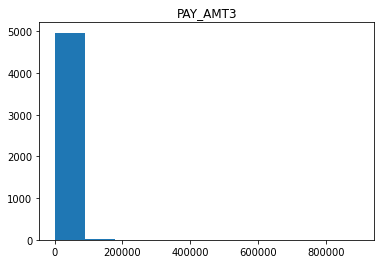

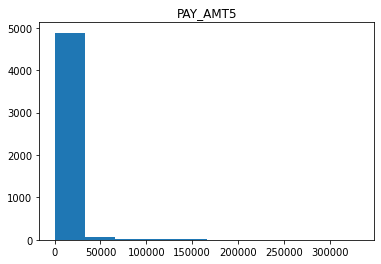

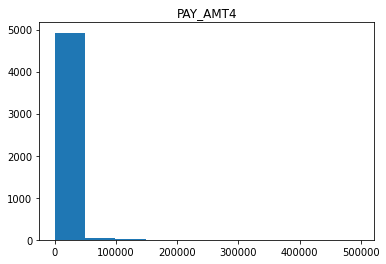

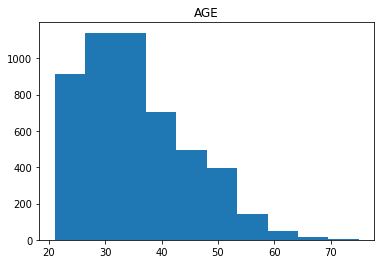

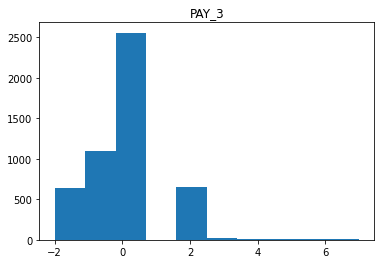

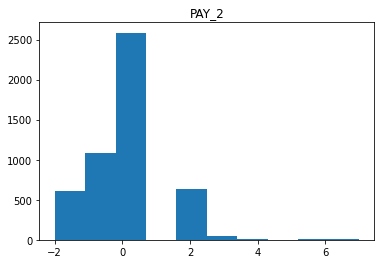

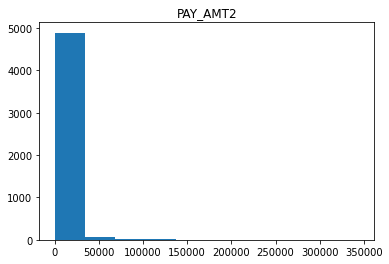

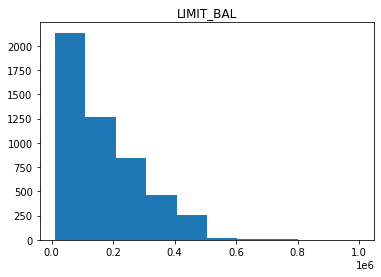

In [16]:
for i in num_cols:
    plt.hist(data=data,x=i)
    plt.title(i)
    plt.show()

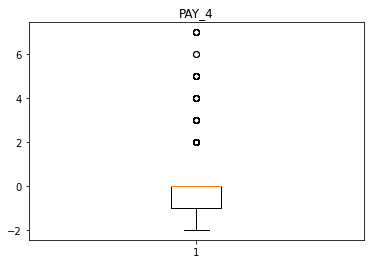

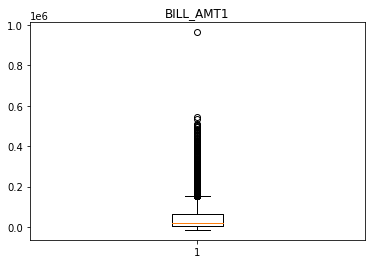

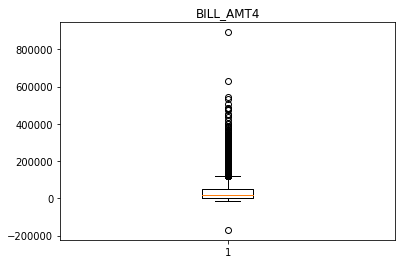

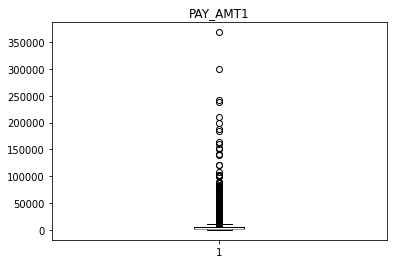

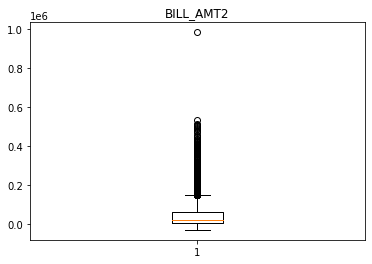

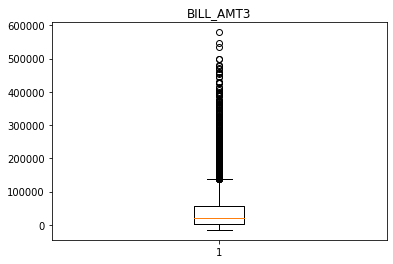

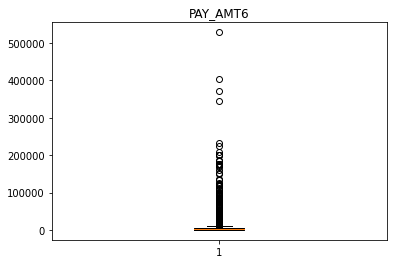

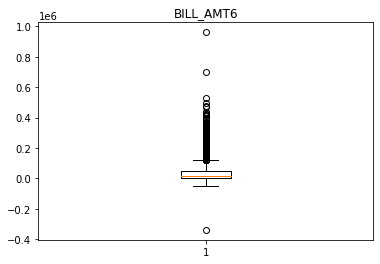

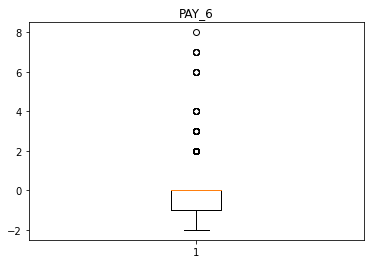

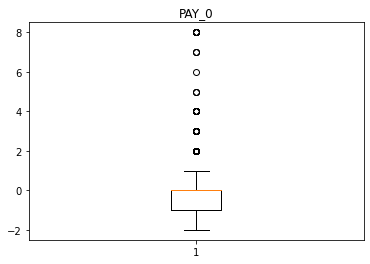

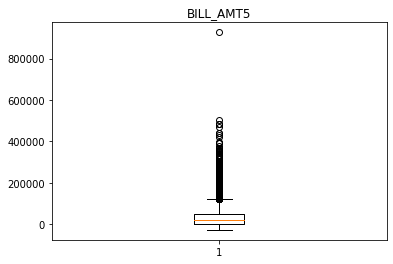

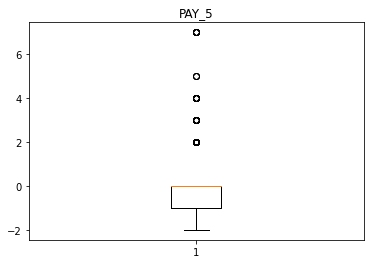

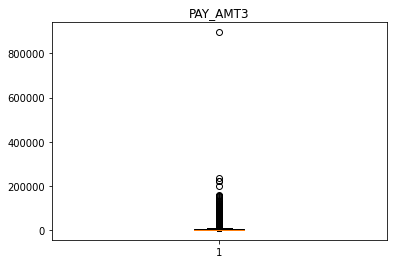

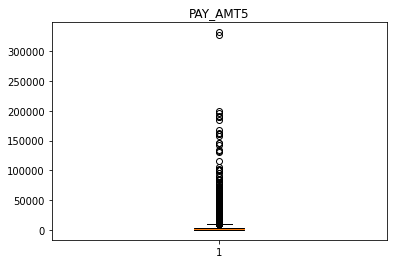

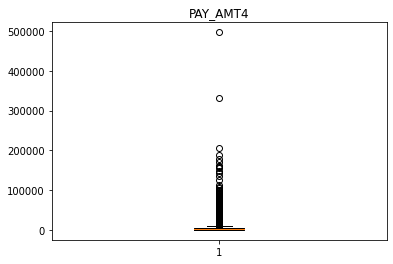

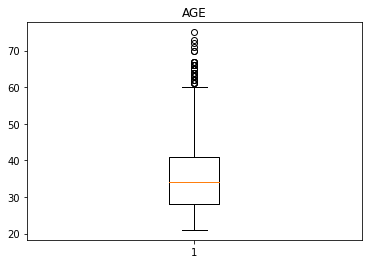

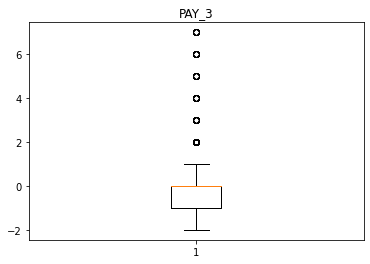

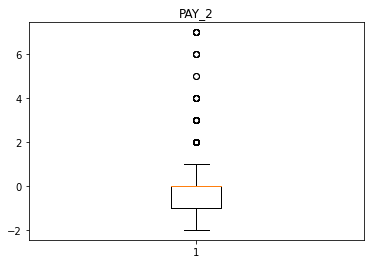

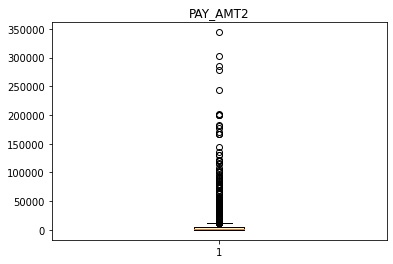

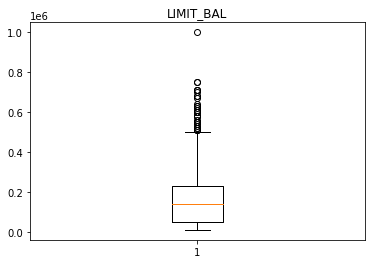

In [18]:
for i in num_cols:
    plt.boxplot(data=data,x=i)
    plt.title(i)
    plt.show()

In [19]:
features=data.drop('default.payment.next.month',axis=1)
target=data['default.payment.next.month']

In [20]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=10)
#(random_state=10 will ensure that you get same values always)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [22]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
model.predict(X_test)

/home/me/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

/home/me/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Text(33.0, 0.5, 'Truth')

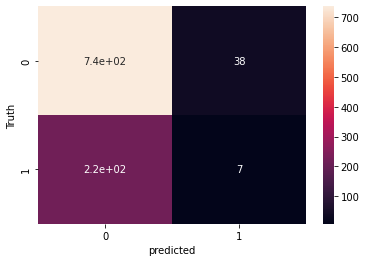

In [28]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_predicted)
import seaborn as sn
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [35]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=1500)
#(n_estimators is the number of trees )
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1500)

/home/me/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Text(33.0, 0.5, 'Truth')

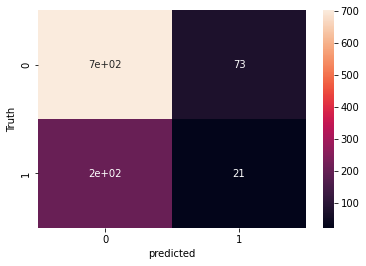

In [36]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_predicted)
import seaborn as sn
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')